In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, InputLayer, LSTM, GRU, Bidirectional


In [9]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
    plt.title('Точність тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду

    # plt.figure()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
    plt.title('Втрати тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду

    plt.show()  # Відобразити графіки

In [10]:
# Задамо параметри для датасету, завантажимо його і підготуємо вхідні дані.
max_features = 10000
maxlen = 500

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

input_train.shape, y_train.shape, input_test.shape, y_test.shape


((25000, 500), (25000,), (25000, 500), (25000,))

Model: SimpleRNN, Bidirectional: False, Deep: False


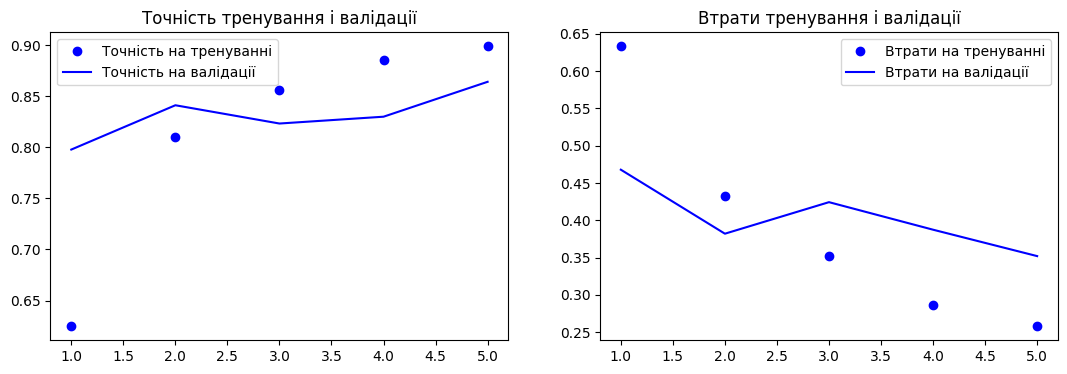

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.8547 - loss: 0.3660
Model: SimpleRNN, Bidirectional: False, Deep: True


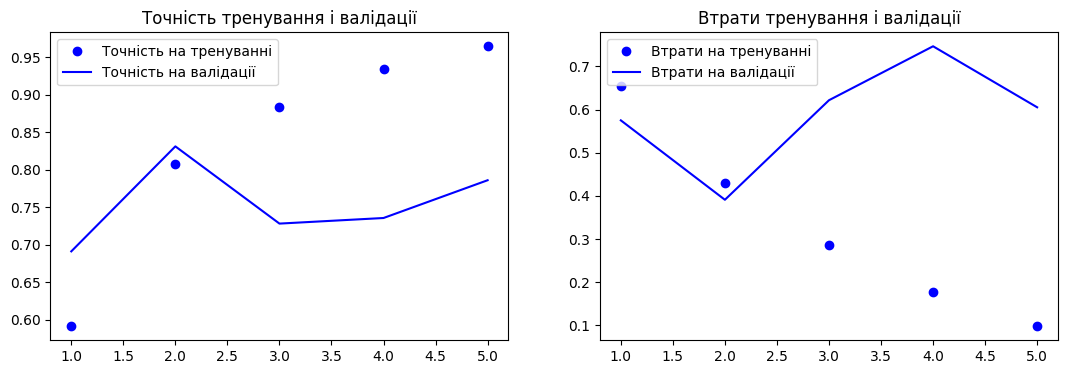

782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - acc: 0.7817 - loss: 0.6211
Model: SimpleRNN, Bidirectional: True, Deep: False


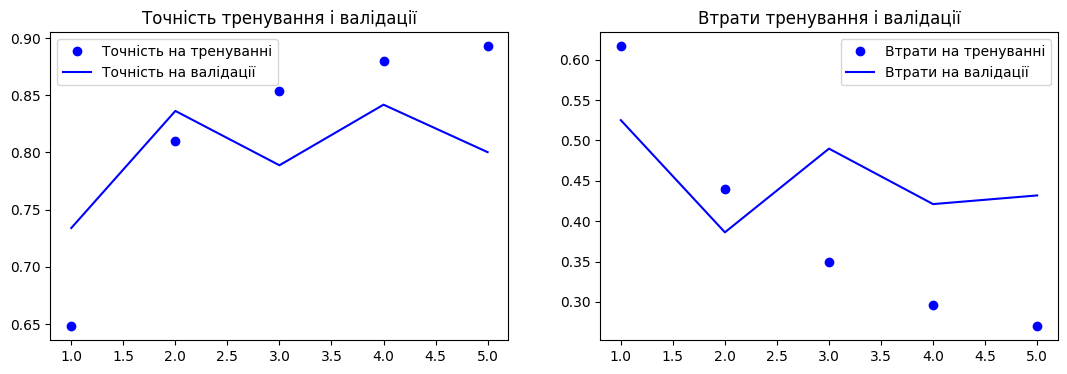

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - acc: 0.8008 - loss: 0.4279
Model: SimpleRNN, Bidirectional: True, Deep: True


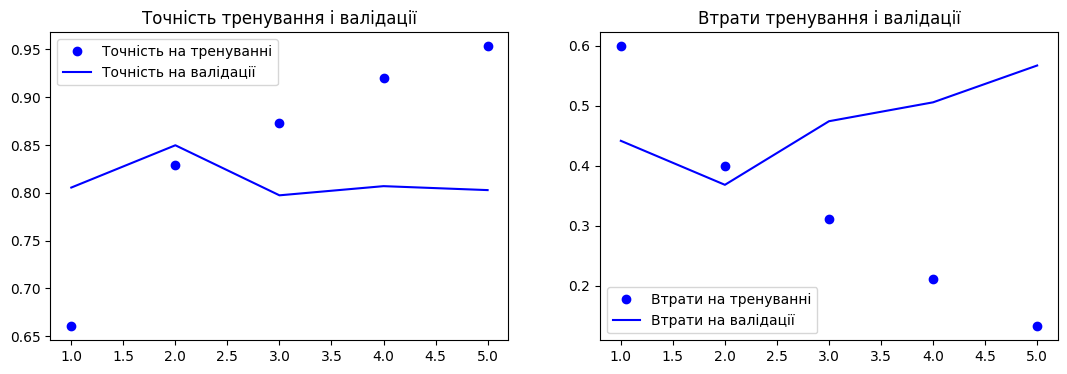

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - acc: 0.7994 - loss: 0.5790
Model: GRU, Bidirectional: False, Deep: False


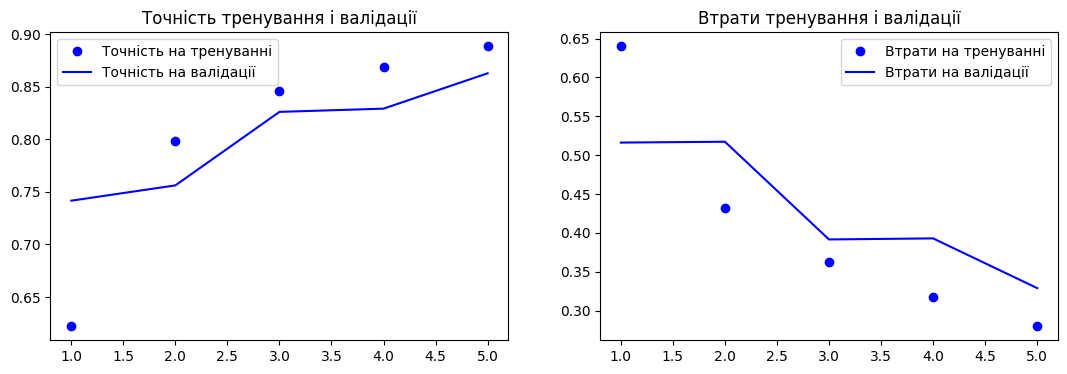

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - acc: 0.8642 - loss: 0.3345
Model: GRU, Bidirectional: False, Deep: True


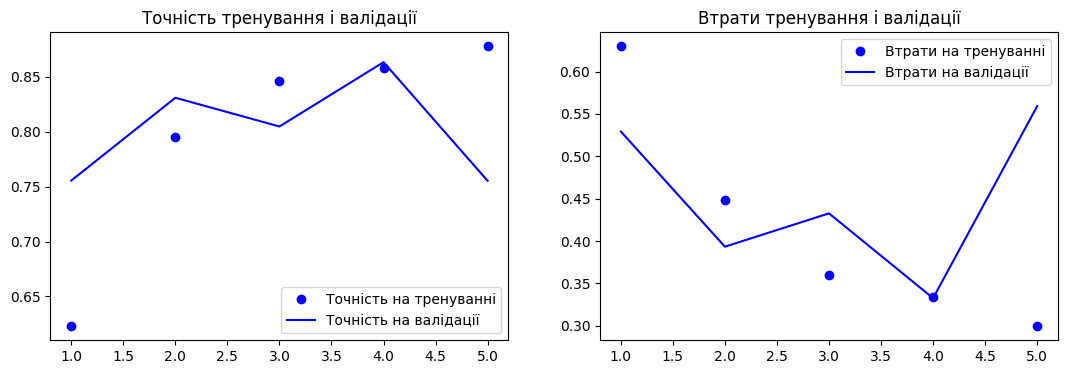

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - acc: 0.7545 - loss: 0.5564
Model: GRU, Bidirectional: True, Deep: False


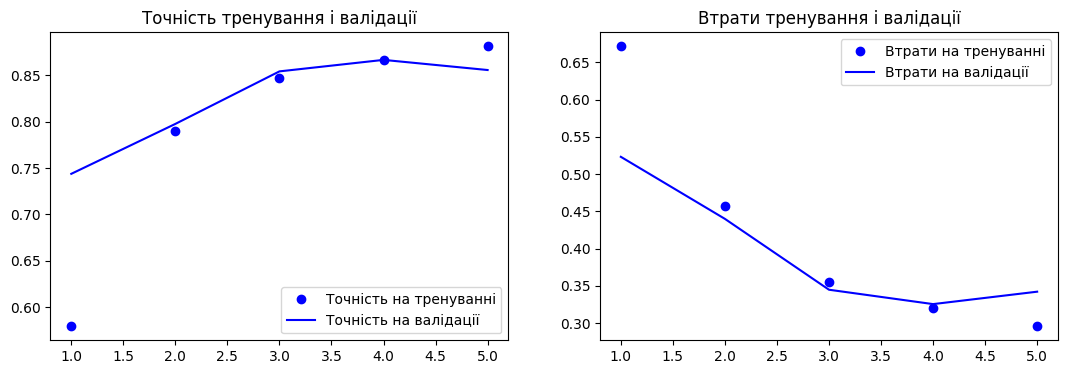

782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - acc: 0.8523 - loss: 0.3487
Model: GRU, Bidirectional: True, Deep: True


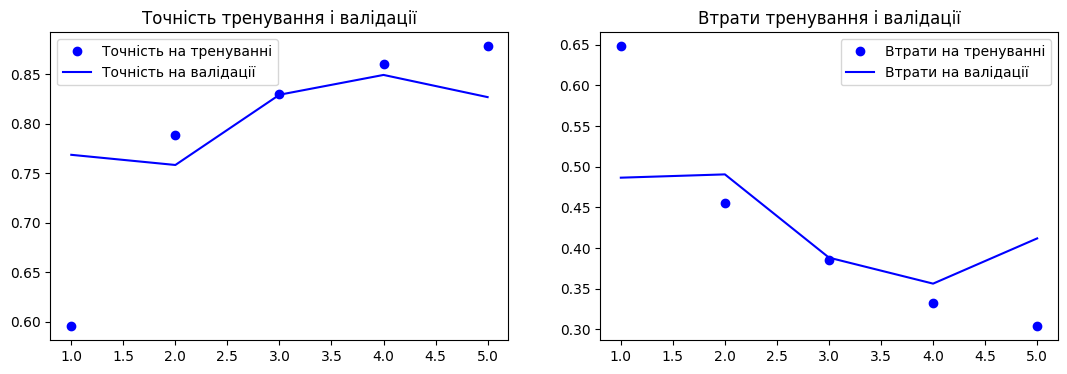

782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - acc: 0.8258 - loss: 0.4129
Model: LSTM, Bidirectional: False, Deep: False


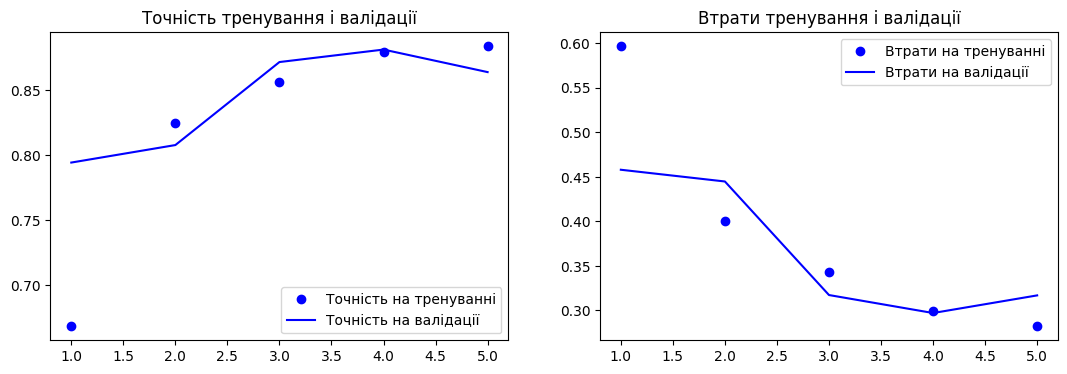

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - acc: 0.8637 - loss: 0.3232
Model: LSTM, Bidirectional: False, Deep: True


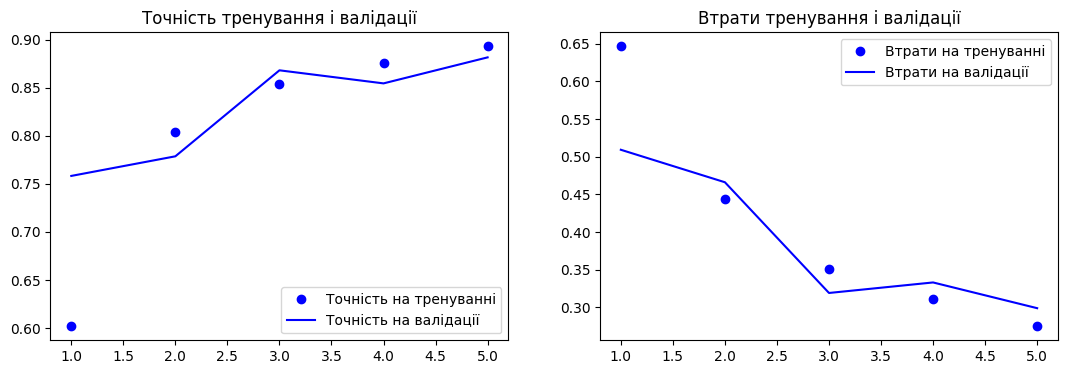

782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - acc: 0.8754 - loss: 0.3097
Model: LSTM, Bidirectional: True, Deep: False


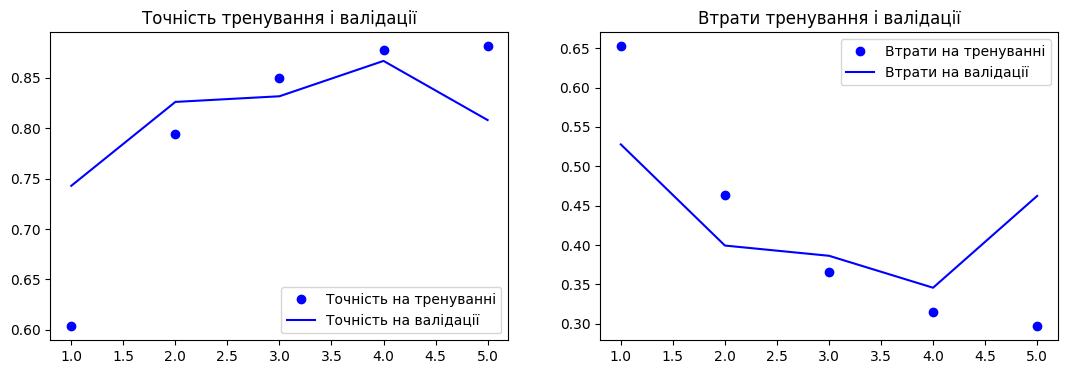

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - acc: 0.8033 - loss: 0.4691
Model: LSTM, Bidirectional: True, Deep: True


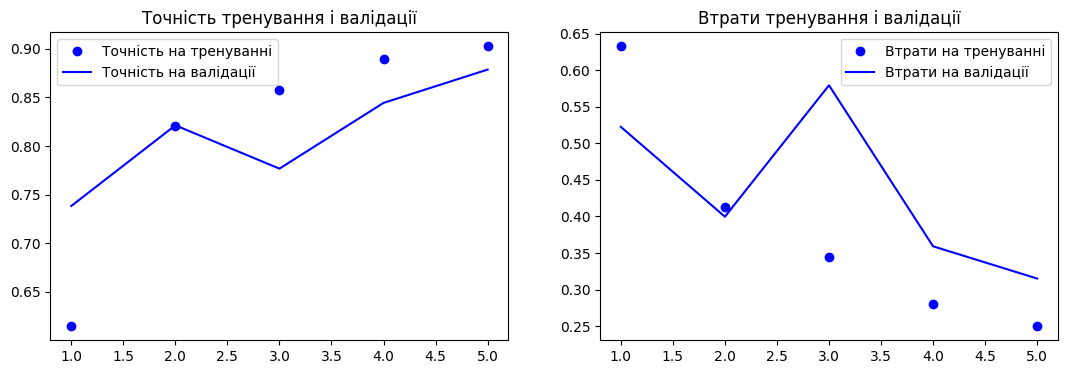

782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - acc: 0.8704 - loss: 0.3275


In [11]:
# Побудуємо декілька рекурентних нейронних мереж різного типу: SimpleRNN, GRU, LSTM.
# Кожну з них також у двосторонньому варіанті.
# Deep RNN реалізуємо у вигляді двошарової RNN:

histories = {}

for model_type in [SimpleRNN, GRU, LSTM]:
    for bidir in [False, True]:
        for deep in [False, True]:
            print(f"Model: {model_type.__name__}, Bidirectional: {bidir}, Deep: {deep}")

            model = Sequential()
            model.add(InputLayer(shape=(maxlen,)))
            model.add(Embedding(input_dim=max_features, output_dim=32))
            
            if deep:
                if bidir:
                    model.add(Bidirectional(model_type(units=32, return_sequences=True)))
                else:
                    model.add(model_type(units=32, return_sequences=True))
            
            if bidir:
                model.add(Bidirectional(model_type(units=32)))
            else:
                model.add(model_type(units=32))
            
            model.add(Dense(units=1, activation="sigmoid"))

            model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

            history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3, verbose=0)

            plot_history(history)

            test_loss, test_acc = model.evaluate(input_test, y_test)
            histories[f"Model: {model_type.__name__}, Bidirectional: {bidir}, Deep: {deep}"] = {"loss": test_loss, "acc": test_acc}


In [16]:
# Найкращий результат показала RNN з конфігурацією LSTM, одностороння, двошарова.

pd.DataFrame(histories).T.style.background_gradient(cmap='viridis')

,loss,acc
"Model: SimpleRNN, Bidirectional: False, Deep: False",0.358969,0.858200
"Model: SimpleRNN, Bidirectional: False, Deep: True",0.617014,0.782160
"Model: SimpleRNN, Bidirectional: True, Deep: False",0.426400,0.800680
"Model: SimpleRNN, Bidirectional: True, Deep: True",0.563002,0.803240
"Model: GRU, Bidirectional: False, Deep: False",0.328714,0.865080
"Model: GRU, Bidirectional: False, Deep: True",0.556592,0.754080
"Model: GRU, Bidirectional: True, Deep: False",0.343254,0.854240
"Model: GRU, Bidirectional: True, Deep: True",0.405502,0.828680
"Model: LSTM, Bidirectional: False, Deep: False",0.318507,0.865200
"Model: LSTM, Bidirectional: False, Deep: True",0.309985,0.875600
